In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras import layers

In [ ]:
# 1. Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

In [ ]:
# 2. Define the Autoencoder architecture
encoding_dim = 64

In [ ]:
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [ ]:
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
# Autoencoder Model
autoencoder = Model(input_img, decoded)

In [ ]:
# Encoder model (for compression)
encoder = Model(input_img, encoded)

In [ ]:
# 3. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# 4. Train the autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.3172 - val_loss: 0.1421
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1323 - val_loss: 0.1111
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1096 - val_loss: 0.1012
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1009 - val_loss: 0.0959
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0958 - val_loss: 0.0920
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0925 - val_loss: 0.0895
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0900 - val_loss: 0.0874
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0882 - val_loss: 0.0857
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0863 - val_loss: 0.0846
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0846 - val_loss: 0.0829
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0836 - val_loss: 0.0817
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# 5. Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


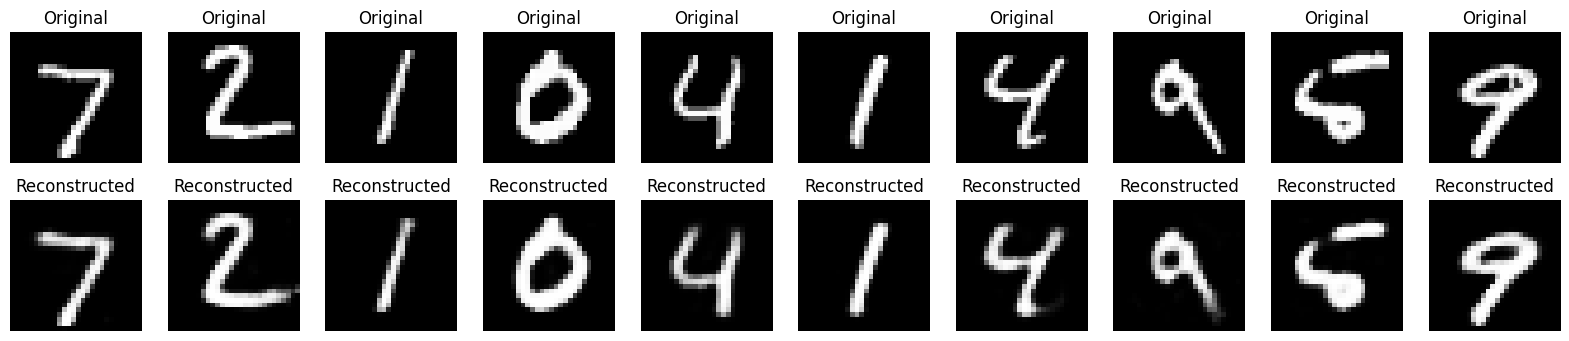

In [ ]:
# 6. Visualize original vs reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


In [ ]:
# 7. (Optional) Check compression output
print("Original dimension:", x_test.shape[1])
print("Compressed dimension:", encoding_dim)
print("Compression ratio: {:.2f}x".format(x_test.shape[1] / encoding_dim))

Original dimension: 784
Compressed dimension: 64
Compression ratio: 12.25x
